
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [1]:
# !pip install seaborn
# !pip freeze > requirements.txt
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [2]:
# при необходимости поменяйте путь к данным
df = pd.read_csv("../../data/howpop_train.csv")

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

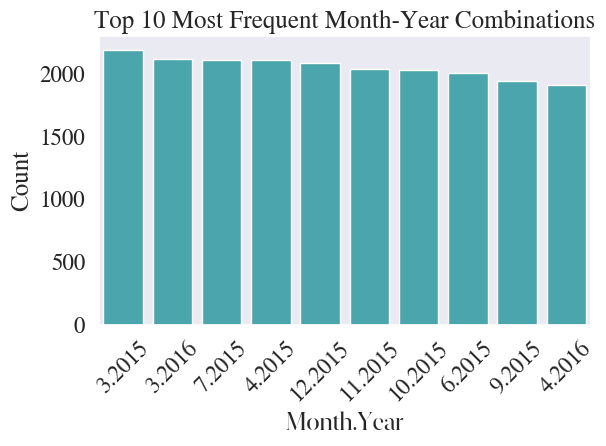

In [11]:
# Создаём столбец month_year более читабельно и эффективно с .astype
df['month_year'] = df['month'].astype(str) + '.' + df['year'].astype(str)

# Получаем топ-10 самых частых значений
top10 = df['month_year'].value_counts().nlargest(10).index

# Фильтруем данные по этим значениям
df_top10 = df[df['month_year'].isin(top10)]

plt.rcParams['font.family'] = 'STIXGeneral'

# Сохраняем порядок сортировки, чтобы на графике было по убыванию
sns.countplot(
    x='month_year',
    data=df_top10,
    order=top10,
    color=(57/255, 181/255, 189/255)
)

# Оформление графика
plt.xticks(rotation=45)
plt.xlabel('Month.Year', fontname='.New York')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Month-Year Combinations')
plt.tight_layout()

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

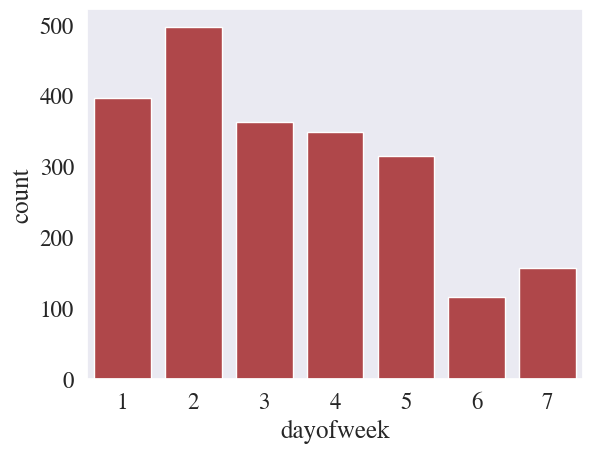

In [12]:
df_filtered = df[df['month_year'] == '3.2015']
sns.countplot(x='dayofweek', data=df_filtered);

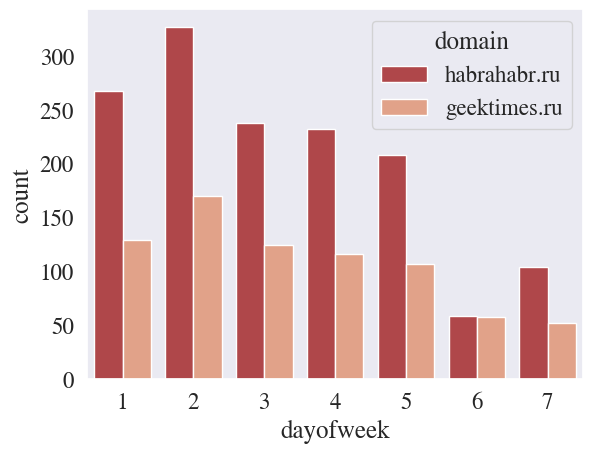

In [13]:
sns.countplot(x='dayofweek', hue='domain', data=df_filtered);

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [14]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


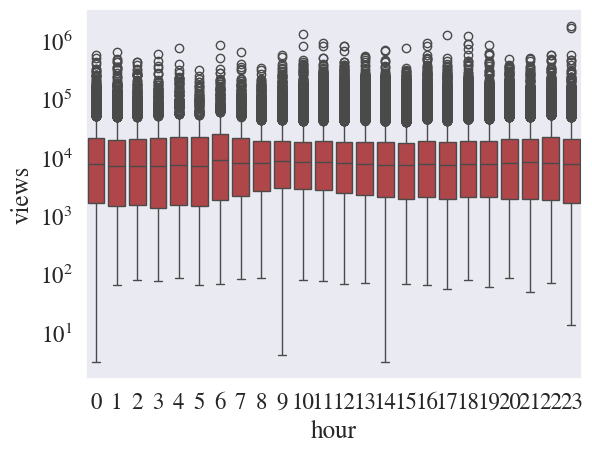

In [15]:
sns.boxplot(x='hour', y='views', data=df);
plt.yscale('log');

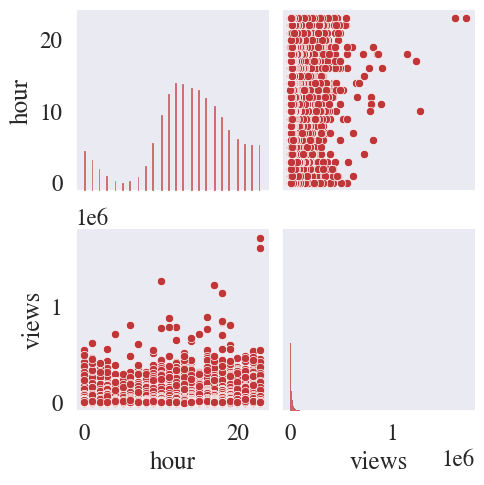

In [16]:
sns.pairplot(df[['hour', 'views']]);

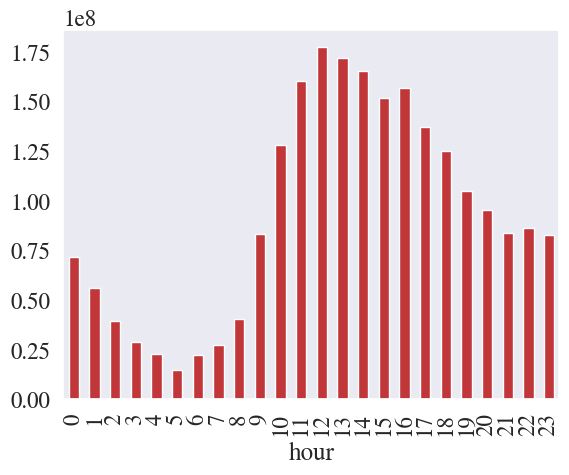

In [17]:
df_views = df.groupby(['hour'])['views'].sum()
df_views.plot(kind='bar');

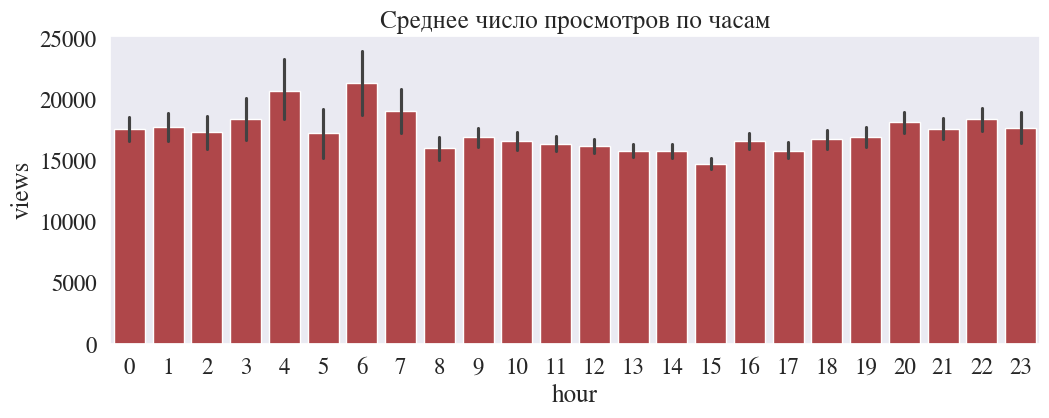

In [18]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='hour', y='views', estimator='mean')

plt.title('Среднее число просмотров по часам');

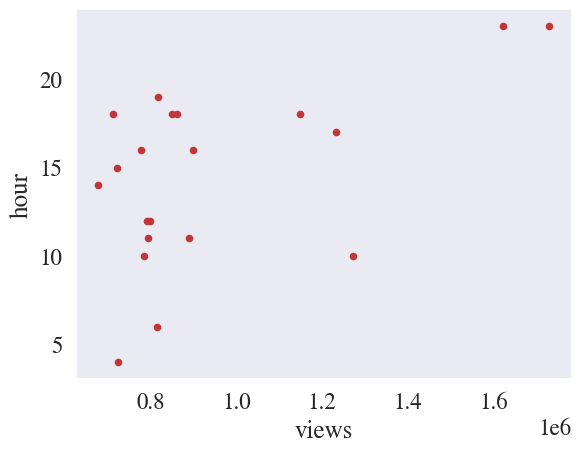

In [19]:
df.nlargest(20, columns='views').plot(y='hour', x='views', kind='scatter');

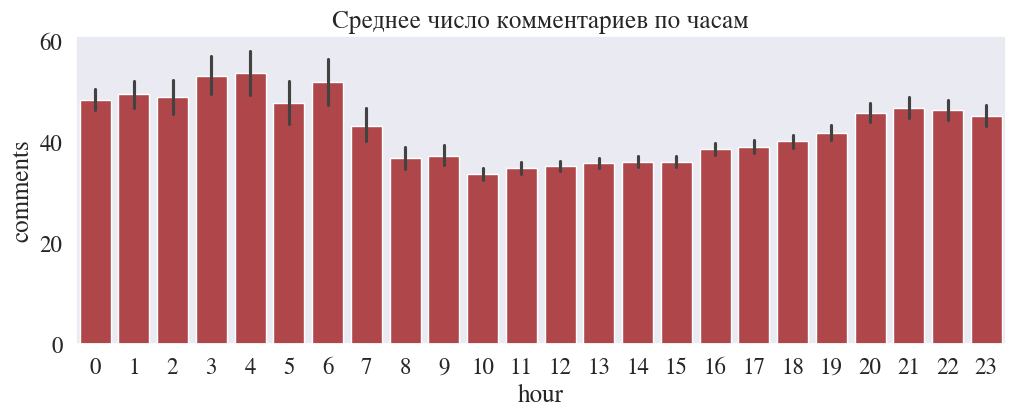

In [20]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='hour', y='comments', estimator='mean')

plt.title('Среднее число комментариев по часам');

In [21]:
df[df['domain'] == 'geektimes.ru'].sort_values(by='views', ascending=False).head().T

,95669,71623,60355,19054,63063
url,https://geektimes.ru/post/252800/,https://geektimes.ru/post/189488/,https://geektimes.ru/post/257592/,https://geektimes.ru/post/81260/,https://geektimes.ru/post/257720/
domain,geektimes.ru,geektimes.ru,geektimes.ru,geektimes.ru,geektimes.ru
post_id,252800,189488,257592,81260,257720
published,2015-01-28 18:02:00,2013-08-09 11:53:00,2012-11-11 04:19:00,2010-01-19 19:29:00,2013-01-14 00:00:00
author,@akibkalo,@Drew003,@vvzvlad,@Budda40,@lipskiy
flow,NaN,NaN,NaN,NaN,NaN
polling,False,False,False,False,False
content_len,7452,13305,20971,666,32203
title,Обновление с Windows 7/8.1 до Windows 10 TP че...,"Что делать, если «кина не будет» или как обойт...",Прекратите скручивать!,До безобразия простой способ скачать видео с y...,Светодиодная лента в качестве освещения комнаты
comments,152,87,331,165,318


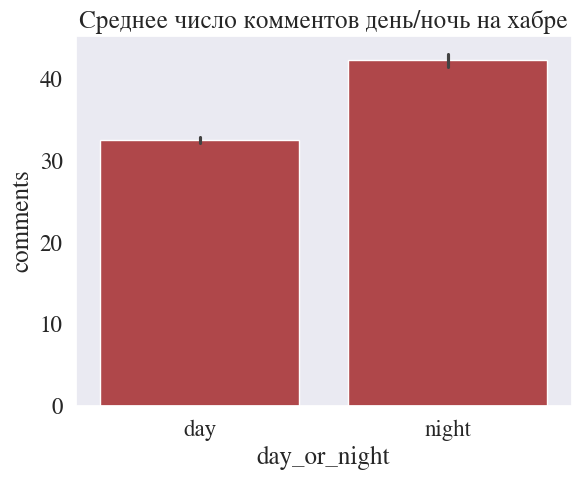

In [22]:
day_or_night = df[df['domain'] == 'habrahabr.ru']['hour'].map(lambda x: 'day' if 8 <= x < 20 else 'night')
df['day_or_night'] = day_or_night

sns.barplot(data=df, x='day_or_night', y='comments', estimator='mean')
plt.title('Среднее число комментов день/ночь на хабре');

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

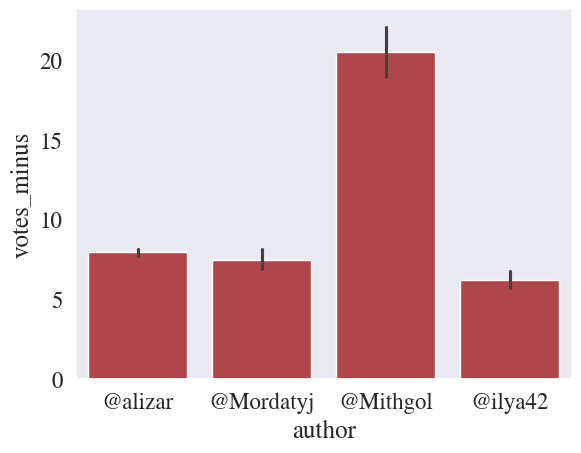

In [23]:
df_authors = df[df['author'].isin(['@Mordatyj', '@Mithgol', '@alizar', '@ilya42'])]
sns.barplot(x='author', y='votes_minus', data=df_authors);

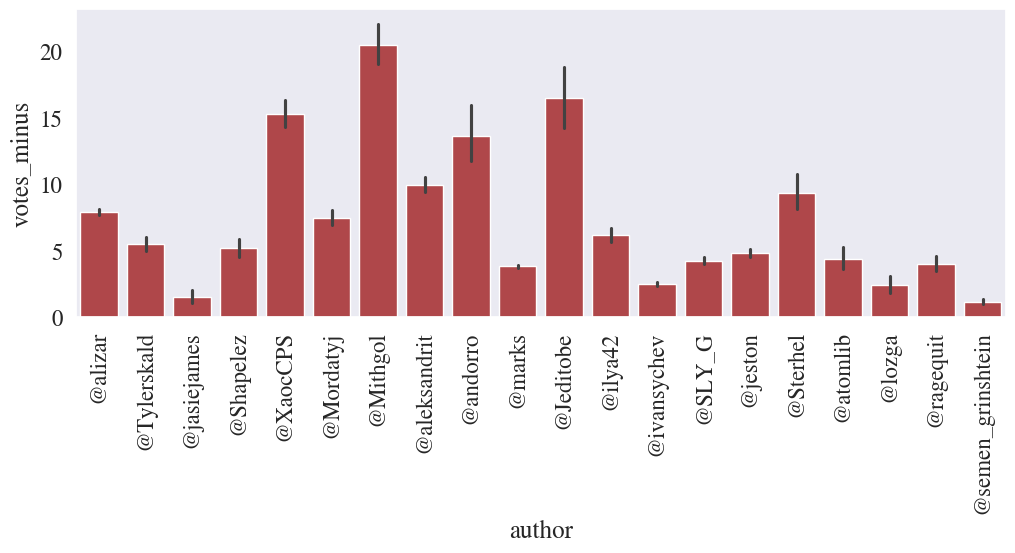

In [24]:
plt.figure(figsize=(12, 4))
top_20_authors = df.groupby('author').count().nlargest(20, 'url').index.to_list();
df_top_20_authors = df[df['author'].isin(top_20_authors)];
sns.barplot(x='author', y='votes_minus', data=df_top_20_authors);
plt.xticks(rotation=90);

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

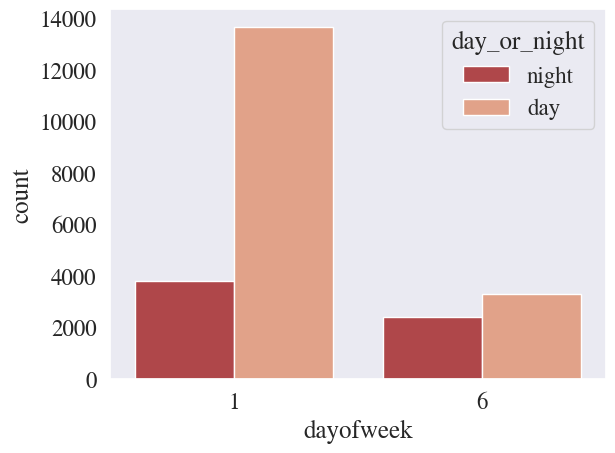

In [25]:
df_mn_st = df[df['dayofweek'].isin([1, 6])]
sns.countplot(x='dayofweek', hue='day_or_night', data=df_mn_st);